# Visualization

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
sns.set()
sns.__version__

'0.9.0'

In [3]:
dataset = pd.read_csv('../data/5_Preprocess_Discretization.csv')
print(dataset.head())

       State_Name District_Name  Crop_Year      Season       Crop    Area  \
0  andhra pradesh        KADAPA       2005      Kharif       Urad    21.0   
1     maharashtra    GADCHIROLI       2008        Rabi      Maize     2.0   
2          odisha    KENDRAPARA       2010      Autumn       Jute  1099.0   
3     uttarakhand       CHAMOLI       2007        Rabi     Barley  1849.0   
4         tripura        KHOWAI       2012  Whole Year  Sugarcane    35.0   

   Production    Rainfall Soil Type      Yield  Rainfall_ZScore  Yield_ZScore  \
0         7.0  104.650000       Red   0.333333        -0.009787     -0.050927   
1         4.0    4.516667     Black   2.000000        -1.186771     -0.048815   
2     12376.0   71.375000       Red  11.261146        -0.400907     -0.037078   
3      2576.0   54.883333  Mountain   1.393186        -0.594753     -0.049584   
4      1881.0  105.412724       Red  53.742857        -0.000822      0.016759   

  Rainfall_Disc Yield_Disc  
0        Medium   Ver

In [4]:
states = dataset.iloc[:, 0].values
states = list(set(states))
years = dataset.iloc[:, 2].values
years = list(set(years))
state_prod = {dataset.iloc[i, 0] : {} for i in range(len(dataset))}
for i in range(len(dataset)):
    state_prod[dataset.iloc[i, 0]][dataset.iloc[i, 2]] = 0
for i in range(len(dataset)):
    state_prod[dataset.iloc[i, 0]][dataset.iloc[i, 2]] += dataset.iloc[i, 6]

### Per State Year Wise Production

In [5]:
from  matplotlib.ticker import FuncFormatter
colors = ['red', 'green', 'magenta', 'purple', 'blue', 'brown', 'black']
# Plot year wise production graph for each state
j = 0

for state in state_prod.keys():
    state_years = list(state_prod[state].keys()) # get state's production years
    state_prods = [state_prod[state][i] for i in state_prod[state].keys()] # get state's production amount
    
    # plot
    fig, ax = plt.subplots()
    sns.scatterplot(state_years, state_prods, color=colors[j%7], ax = ax) # scatter plot 
    sns.lineplot(state_years, state_prods, color=colors[j%7], ax = ax) # line plot
    plt.xlabel("Year")
    plt.ylabel("Production")
    plt.title(str(state).capitalize())
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    path = "../plots/Year_Wise_Production/" + str(state).capitalize()+'.png'
    plt.savefig(path) # save figure
    plt.close()
    j+=1

print("-----------------------------------\nphoto saved in plots/Year_Wise_Production folder...\n-----------------------------------\n")

-----------------------------------
photo saved in plots/Year_Wise_Production folder...
-----------------------------------



### Heatmap Season-Crop-Production

In [6]:
xticks = [] # values on x axis
yticks = [] # values on y axis
heatmap_values = [] # intensity (production) values for heatmaps
season = list(set(dataset.iloc[:, 3].values))
crops = list(set(dataset.iloc[:, 4].values))
season_crop_prod = {}
for i in season:
    season_crop_prod[i.strip()] = {j.strip():0 for j in crops}
# populating the dictionary
for i in range(len(dataset)):
    season_crop_prod[dataset.iloc[i, 3].strip()][dataset.iloc[i, 4].strip()] += dataset.iloc[i, 6]

# normalizing the values between 0 to 100
for i in season_crop_prod.keys():
    max_prod = 0
    min_prod = 0
    for j in season_crop_prod[i].values():
        min_prod = min(min_prod, j)
        max_prod = max(max_prod, j)
    diff = max_prod- min_prod
    for j in season_crop_prod[i].keys():
        season_crop_prod[i][j] = ((season_crop_prod[i][j]-min_prod)/diff)*100

# prepare heatmap variables for plotting heatmap
xticks = list(season_crop_prod.keys())
yticks = list(season_crop_prod[xticks[0]].keys())
for i in xticks:
    y = []
    for j in yticks:
        y.append(season_crop_prod[i][j])
    heatmap_values.append(y)

#plot heat map
heatmap_values = np.array(heatmap_values)
heatmap_values = np.around(heatmap_values, decimals=5)
heatmap_values = heatmap_values.T
fig, ax = plt.subplots(figsize=(18, 32))
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("font", size=13)
hm = sns.heatmap(heatmap_values, annot=heatmap_values, xticklabels=xticks, yticklabels=yticks)
plt.savefig("../plots/HeatMaps/Season_vs_Crop_heatmap.png")
plt.close()
print("-----------------------------------\nphoto saved in plots/HeatMaps folder...\n-----------------------------------\n")

-----------------------------------
photo saved in plots/HeatMaps folder...
-----------------------------------



### Heatmap Rainfall-Crop-Production

In [7]:
xticks = [] # values on x axis
yticks = [] # values on y axis
heatmap_values = [] # intensity (production) values for heatmaps
rain = ['Very_Low', 'Low', 'Medium', 'High', 'Very_High']
crops = list(set(dataset.iloc[:, 4].values))
rain_crop_prod = {}
for i in rain:
    rain_crop_prod[i.strip()] = {j.strip():0 for j in crops}
# populating the dictionary
for i in range(len(dataset)):
    rain_crop_prod[dataset.iloc[i, -2].strip()][dataset.iloc[i, 4].strip()] += dataset.iloc[i, 6]

# normalizing the values between 0 to 100
for i in rain_crop_prod.keys():
    max_prod = 0
    min_prod = 0
    for j in rain_crop_prod[i].values():
        min_prod = min(min_prod, j)
        max_prod = max(max_prod, j)
    diff = max_prod- min_prod
    for j in rain_crop_prod[i].keys():
        rain_crop_prod[i][j] = ((rain_crop_prod[i][j]-min_prod)/diff)*100

# prepare heatmap variables for plotting heatmap
xticks = list(rain_crop_prod.keys())
yticks = list(rain_crop_prod[xticks[0]].keys())
for i in xticks:
    y = []
    for j in yticks:
        y.append(rain_crop_prod[i][j])
    heatmap_values.append(y)

#plot heat map
heatmap_values = np.array(heatmap_values)
heatmap_values = np.around(heatmap_values, decimals=5)
heatmap_values = heatmap_values.T
fig, ax = plt.subplots(figsize=(18, 32))
plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("font", size=13)
hm = sns.heatmap(heatmap_values, annot=heatmap_values, xticklabels=xticks, yticklabels=yticks)
plt.savefig("../plots/HeatMaps/Rain_vs_Crop_heatmap.png")
plt.close()

print("-----------------------------------\nphoto saved in plots/HeatMaps folder...\n-----------------------------------\n")

-----------------------------------
photo saved in plots/HeatMaps folder...
-----------------------------------



## Scatter Plot
A scatter plot is made between Rainfall and Production for each crop type.

-----------------------------------
photo saved in plots/"Scatter Plots" folder...
-----------------------------------



<Figure size 1152x648 with 0 Axes>

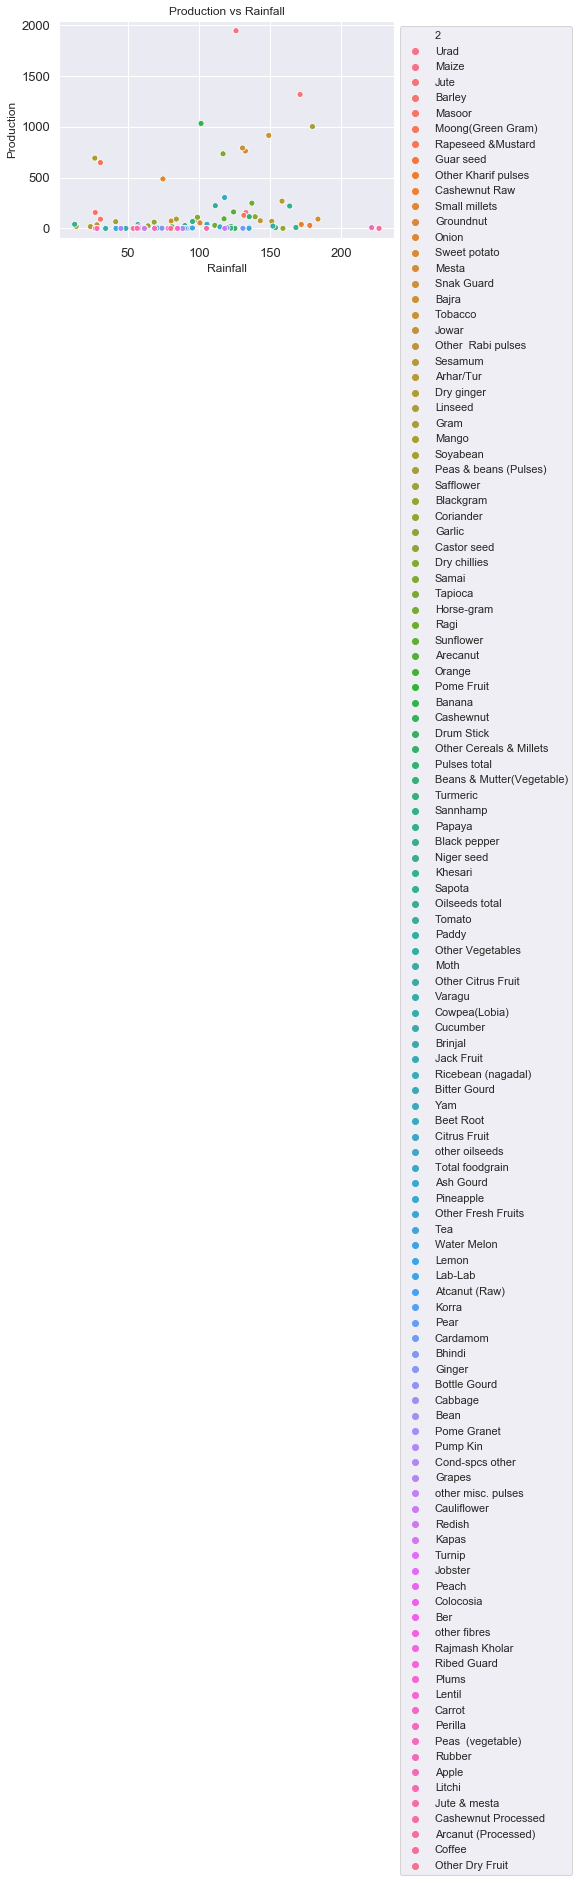

In [8]:
p = {}
maxd = 0
crop_name = ''

# Add production values and rainfall values for each crop
for i in range(0, len(dataset)):
    crop = dataset.iloc[i, 4]
    if crop not in p:
        p[crop] = [0, 0, 0]
    
    p[crop][0] += dataset.iloc[i, 6]
    p[crop][1] += dataset.iloc[i, 7]
    p[crop][2] += 1
    
    if p[crop][0] > maxd:
        maxd = p[crop][0]
        crop_name = dataset.iloc[i, 4]

# Average the rainfall values and scale down the production values
for k in p.keys():
    p[k][1] /= p[k][2]
    p[k][2] = k
    p[k][0] /= 1e5

x, y = [], []
del p['Coconut ']
del p['Sugarcane']
del p['Rice']
del p['Wheat']
del p['Potato']
del p['Cotton(lint)']
for i in p.keys():
    x.append(p[i][0])
    y.append(p[i][1])
v = list(p.values())
v = pd.DataFrame(v)

plt.figure(figsize=(16, 9))
fig, ax = plt.subplots()
sns.scatterplot(x=1, y=0, hue=2, data=v, ax=ax)
lgd = ax.legend(bbox_to_anchor=(1,1), loc=2)
plt.xlabel("Rainfall")
plt.ylabel("Production")
plt.title("Production vs Rainfall")
plt.savefig('../plots/Scatter Plots/productions_vs_rainfall.png', bbox_extra_artists = (lgd,))

print("-----------------------------------\nphoto saved in plots/\"Scatter Plots\" folder...\n-----------------------------------\n")

In [9]:
dataset.drop(["State_Name", "District_Name", "Crop_Year", "Soil Type", "Season"], axis = 1, inplace = True)
crops=list(set(dataset.iloc[:, 0].values))

## Box Plot

Box plots are created of each crop for Rainfall, Area and Production.

In [ ]:
for crop in crops:
    vals=[]
    for i in range(0, len(dataset)):
        if dataset.iloc[i, 0] == crop:
            vals.append(list(dataset.iloc[i, 1:-5]))
    x = pd.DataFrame(vals)
    x.columns = ['Area', 'Production', 'Rainfall']
    
    # Normalise the data for easy visualisation
    for i in x.columns:
        min_area = x[i].min()
        max_area = x[i].max()
        x[i] = (x[i]-min_area)/(max_area-min_area)
    
    plt.figure(figsize=(25, 9))
    g = sns.boxplot(data=x, palette="Set2")
    plt.ylabel("Values")
    plt.title("Parameters for " + crop +" Production")
    plt.savefig('../plots/Box_Plots/'+crop.split('/')[0] + '_params.png')
    plt.close()

print("-----------------------------------\nphoto saved in plots/Box_Plots folder...\n-----------------------------------\n")